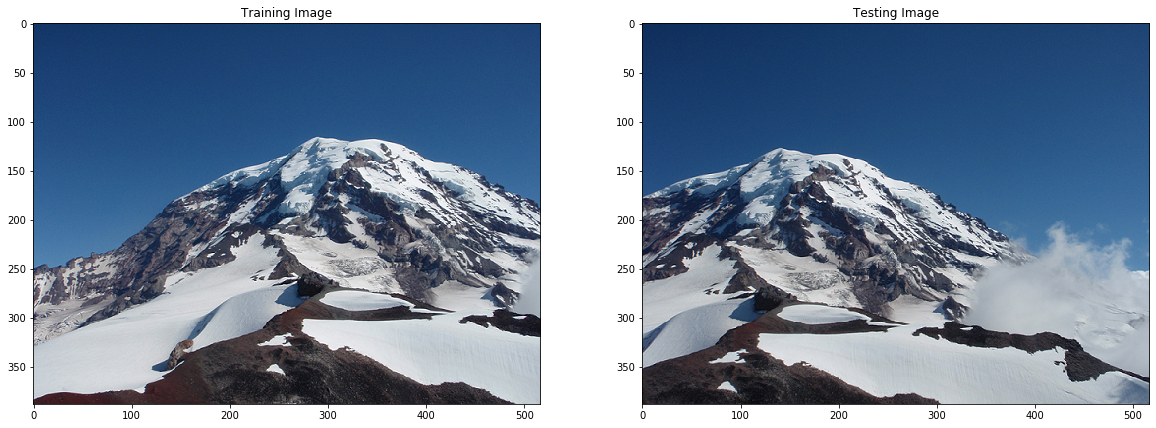

In [36]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Load the image
image1 = cv2.imread('Rainier1.png')

# Convert the training image to RGB
training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

# Load the image
image2 = cv2.imread('Rainier2.png')

test_image = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

# Display traning image and testing image
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(training_image)

plots[1].set_title("Testing Image")
plots[1].imshow(test_image)

### Установите библиотеку чтобы был доступен BRIEF алгоритм

In [ ]:
! pip install opencv-contrib-python

## Находим ключевые точки

In [37]:
fast = cv2.FastFeatureDetector_create() 
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

train_keypoints = fast.detect(training_gray, None)
test_keypoints = fast.detect(test_gray, None)

train_keypoints, train_descriptor = brief.compute(training_gray, train_keypoints)
test_keypoints, test_descriptor = brief.compute(test_gray, test_keypoints)

In [38]:
keypoints_test_img = np.copy(test_image)
keypoints_train_img = np.copy(training_image)

cv2.drawKeypoints(training_image, train_keypoints, keypoints_train_img, color = (0, 255, 0))
cv2.drawKeypoints(test_image, test_keypoints, keypoints_test_img, color = (0, 255, 0))

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints")
plots[0].imshow(keypoints_train_img, cmap='gray')

plots[1].set_title("Tetst keypoints")
plots[1].imshow(keypoints_test_img, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))

Number of Keypoints Detected In The Training Image:  3965
Number of Keypoints Detected In The Query Image:  3136


In [39]:
# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# Perform the matching between the BRIEF descriptors of the training image and the test image
matches = bf.match(train_descriptor, test_descriptor)

## Нахождение пар точек

In [40]:
# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# Perform the matching between the BRIEF descriptors of the training image and the test image
matches = bf.match(train_descriptor, test_descriptor)

result = cv2.drawMatches(training_image, train_keypoints, test_gray, test_keypoints, matches, test_gray, flags = 2)

# Display the best matching points
plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))


Number of Matching Keypoints Between The Training and Query Images:  2061


## Находим матрицу гомографии

In [41]:
ptsA = np.float32([train_keypoints[match.queryIdx].pt for match in matches]).reshape(-1,1,2)
ptsB = np.float32([test_keypoints[match.trainIdx].pt for match in matches]).reshape(-1,1,2)

# compute the homography between the two sets of points
reprojThresh = 2
(H, status) = cv2.findHomography(ptsB, ptsA, cv2.RANSAC, reprojThresh)

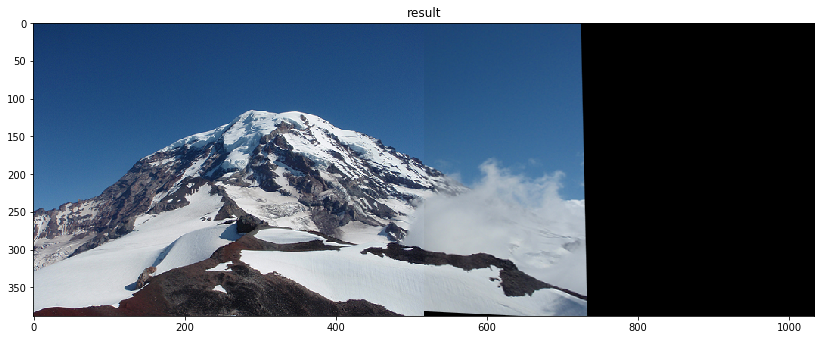

In [42]:
result = cv2.warpPerspective(image2, H, (image1.shape[1] + image2.shape[1], image1.shape[0]))

result[0:image1.shape[0], 0:image1.shape[1]] = image1

# Display the best matching points
plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('result')
plt.imshow(result)
plt.show()